In [14]:
import scqubits
import numpy as np
import matplotlib.pyplot as plt

In [23]:
qbt = scqubits.Fluxonium(EJ=4,EC=4/2.7,EL=4/45,flux = 0,cutoff=110,truncated_dim=18)

In [28]:
np.max(qbt.n_operator(energy_esys=True))

0.9007761841705706j

In [30]:
np.max(qbt.n_operator(energy_esys=True)) / np.pi

0.2867259646604036j

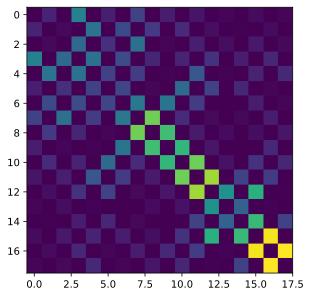

In [33]:
plt.imshow(np.abs(qbt.n_operator(energy_esys=True)))

In [25]:
np.max(qbt.n_operator(energy_esys=True))

0.9007761841705706j

In [26]:
np.max(qbt.phi_operator(energy_esys=True)) / np.pi

2.7709970788748297

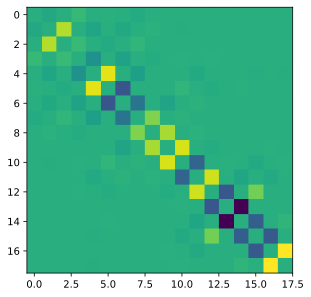

In [27]:
plt.imshow(qbt.phi_operator(energy_esys=True))

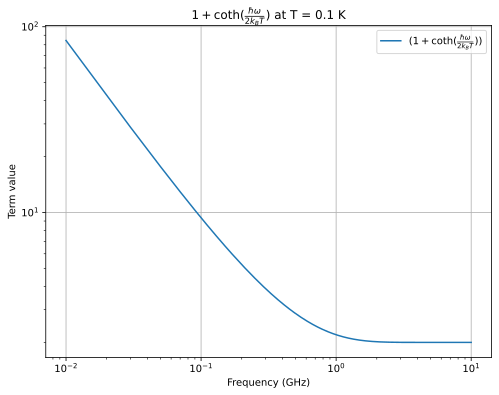

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.054571817e-34  # Reduced Planck constant (J·s)
k_B = 1.380649e-23      # Boltzmann constant (J/K)
T = 20*1e-3                 # Temperature in Kelvin (for example, 0.1 K)

# Frequency range in GHz
frequencies = np.linspace(0.01, 10, 500)  # GHz, avoid division by zero
omega = frequencies * 1e9 * 2 * np.pi     # Convert GHz to angular frequency in rad/s

# Function to calculate the term (1 + coth(hbar * omega / 2 * k_B * T))
def coth(x):
    return 1 / np.tanh(x)

thermal_factor = 1 + coth(hbar * omega / (2 * k_B * T))

# Plot
plt.figure(figsize=(8, 6))
plt.plot(frequencies, thermal_factor, label=r'$(1 + \coth(\frac{\hbar \omega}{2 k_B T}))$')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'Term value')
plt.xscale('log')
plt.yscale('log')
plt.title(r'$1 + \coth(\frac{\hbar \omega}{2 k_B T})$ at T = 0.1 K')
plt.grid(True)
plt.legend()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.054571817e-34  # Reduced Planck constant (J·s)
k_B = 1.380649e-23      # Boltzmann constant (J/K)
T = 20*1e-3                 # Temperature in Kelvin (for example, 0.1 K)

# Frequency range in GHz
frequencies  = np.concatenate( ( - 1* np.linspace(10, 0.01, 500) , np.linspace(0.01, 10, 500), )) # GHz, avoid division by zero
omega = frequencies * 1e9 * 2 * np.pi     # Convert GHz to angular frequency in rad/s

# Function to calculate the term (1 + coth(hbar * omega / 2 * k_B * T))
def coth(x):
    return 1 / np.tanh(x)

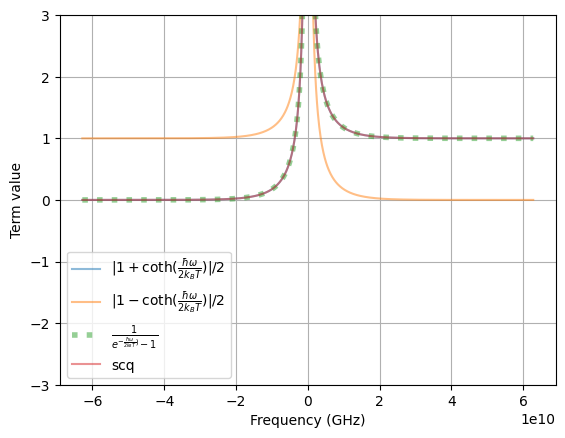

In [45]:


thermal_factor = hbar * omega / (2 * k_B * T)  
thermal_factor_string = rf"$\frac{{\hbar \omega}}{{2 k_B T}})$"
plt.plot(omega, np.abs(1+ coth(thermal_factor/2))/2, label=rf'$|1 + \coth(${thermal_factor_string}|/2',alpha=0.5)
plt.plot(omega, np.abs(1-coth(thermal_factor/2))/2, label=rf'$|1-\coth(${thermal_factor_string}|/2',alpha=0.5)
plt.plot(omega, np.abs(1/ (np.exp(-thermal_factor)-1)), label=rf'$\frac{{1}}{{e^{{-{thermal_factor_string[1:-1]}}}-1}}$',linestyle=':',alpha=0.5,lw=4)

plt.plot(omega, coth(np.abs(thermal_factor)/2)  / ( 1+np.exp(-thermal_factor)), label=rf'scq',alpha=0.5)

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'Term value')
plt.ylim(-3,3)
plt.grid(True)
plt.legend()
plt.show()

In [63]:
( (np.log(1*10e3))**2      ),    (     (np.log(3e9/1))**2      +    2*(np.log(1*10e3))**2      )

(84.83036976765439, 645.8551044644823)

In [64]:
gamma_linear = 1e-9
gamma_quad = 1e-7

np.sqrt(2* gamma_linear * 84 + 2*gamma_quad*645)

0.01136521007284951

In [65]:
np.sqrt(2* gamma_linear * 1 + 2*gamma_quad*1)

0.0004494441010848846